# PCA analysis on Performance, Training Loads, and Wellness

We have already done PCA analysis on wellness and training data over all existing dates, and we observed that there was no specific relationship between the training load clusters and wellness clusters. In fact we observed that the PCA on RPE data was not as clustered as the wellness data and each player kind of had their own cluster.

We have also seen that there are not many relationships between wellness and training loads. To confirm this we can perform PCA on the wellness and training load data and look for an specific patterns. Note that this is an exploratory notebook at the end of analysis to ensure that we did not missing anything important.

In [1]:
import pandas as pd
import numpy as np
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import warnings

In [2]:
warnings.filterwarnings('ignore')
np.random.seed(5151)
merged_df = pd.read_csv('./processed_data/merged_df.csv')
merged_df = merged_df.drop(columns=['Unnamed: 0'])
print(merged_df.head())

         Date  GameID Outcome  TeamPoints  PlayerID  MaxSpeedInGame  \
0  2017-11-30       1       W          19         2        7.284728   
1  2017-11-30       1       W          19         3        6.852436   
2  2017-11-30       1       W          19         4        7.267784   
3  2017-11-30       1       W          19         6        6.338894   
4  2017-11-30       1       W          19         7        7.065283   

   MaxAccelImpulseInGame  AcuteLoad  ChronicLoad  AcuteChronicRatio  ...  \
0               4.423615     206.57       371.20               0.56  ...   
1               4.888893     407.86       454.67               0.90  ...   
2               5.694449     236.00       406.90               0.58  ...   
3               4.777782     297.29       415.87               0.71  ...   
4               4.091273     237.57       476.60               0.50  ...   

   Menstruation  Pain  Illness  Nutrition  TrainingReadiness  \
0           1.0   1.0      3.0        3.0           

In [3]:
player_data = merged_df.groupby('PlayerID',as_index = False).mean()
player_id_series = player_data['PlayerID']
player_data

,PlayerID,GameID,TeamPoints,MaxSpeedInGame,MaxAccelImpulseInGame,AcuteLoad,ChronicLoad,AcuteChronicRatio,MonitoringScore,Fatigue,...,Menstruation,Pain,Illness,Nutrition,TrainingReadiness,StandardizedMonitoringScore,StandardizedPain,StandardizedIllness,StandardizedMenstruation,wellness
0,1,24.500000,21.214286,7.683961,5.077220,196.245000,260.146071,0.702143,18.071429,3.571429,...,0.857143,0.964286,3.000000,2.964286,3.571429,-0.080145,0.252715,0.330081,-0.002048,0.500603
1,2,19.500000,21.210526,6.632284,4.814491,182.392105,304.258684,0.614737,18.078947,3.315789,...,0.894737,0.684211,3.000000,2.552632,0.000000,-0.078115,-0.618921,0.330081,0.105611,-0.261345
2,3,18.115385,20.500000,6.826691,4.923544,318.220385,428.993846,0.726538,20.269231,3.923077,...,1.000000,1.000000,3.000000,3.000000,99.230769,0.513047,0.363863,0.330081,0.407056,1.614046
3,4,19.540541,20.756757,6.632953,5.070074,210.606486,306.715676,0.685946,16.648649,2.891892,...,0.783784,1.000000,3.000000,3.000000,98.108108,-0.464156,0.363863,0.330081,-0.212128,0.017660
4,5,24.500000,21.214286,7.721914,4.955451,45.623571,107.605000,0.369286,20.857143,3.964286,...,0.928571,0.714286,2.821429,2.178571,98.214286,0.671726,-0.525323,-0.102254,0.202504,0.246653
5,6,3.000000,22.400000,6.511335,4.998615,320.430000,421.270000,0.758000,20.000000,4.000000,...,1.000000,1.000000,3.000000,2.600000,92.000000,0.440381,0.363863,0.330081,0.407056,1.541380
6,7,19.852941,21.617647,7.210339,4.703099,232.302647,340.501471,0.702647,18.088235,3.352941,...,1.000000,0.823529,2.941176,2.911765,96.911765,-0.075609,-0.185340,0.187664,0.407056,0.333772
7,8,17.500000,20.823529,6.960623,4.978461,262.820000,296.632647,0.971176,21.264706,3.794118,...,1.000000,0.794118,2.941176,2.558824,91.764706,0.781728,-0.276874,0.187664,0.407056,1.099574
8,9,5.500000,21.200000,6.931128,4.438105,229.186000,317.229000,0.725000,19.000000,3.900000,...,1.000000,1.000000,3.000000,1.900000,94.500000,0.170479,0.363863,0.330081,0.407056,1.271478
9,10,15.730769,20.884615,7.614805,4.715103,193.796538,299.883462,0.681923,17.384615,3.153846,...,0.961538,0.384615,2.346154,3.000000,77.115385,-0.265517,-1.551306,-1.252931,0.296912,-2.772842


In [16]:
# Apply PCA, and plot the components
def plotPCA(data, labels, num_components, title=None):

    HORIZONTAL_OFFSET = 0
    VERTICAL_OFFSET = 0

    pca = PCA(n_components = num_components)
    principal_components = pca.fit_transform(data)
    print(principal_components)
    fig, ax = plt.subplots()

    ax.scatter(principal_components[:, 0], principal_components[:, 1])
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    
    if title:
        plt.title(title)
    
    for i in range(len(player_id_series)):
        ax.annotate(str(i + 1), (principal_components[i, 0] + HORIZONTAL_OFFSET, principal_components[i, 1] + VERTICAL_OFFSET))

[[-1.01303177 -0.21956245]
 [ 0.03317415  0.06416901]
 [-0.15901045 -0.04875425]
 [ 0.03762261 -0.1913764 ]
 [-1.05341489 -0.0985779 ]
 [ 0.15778608 -0.11749682]
 [-0.54699497  0.16396587]
 [-0.29181578 -0.10634146]
 [-0.27314525  0.43449597]
 [-0.95113959  0.1438657 ]
 [-0.24989835 -0.17840546]
 [ 0.57919856  0.29961371]
 [-0.07124406  0.0040031 ]
 [ 0.76212914  0.16942514]
 [ 0.67085128 -0.02705742]
 [ 0.5151507  -0.16150839]
 [ 1.85378259 -0.13045796]]


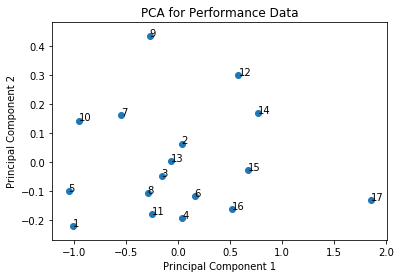

In [19]:
performance = player_data[['MaxSpeedInGame','MaxAccelImpulseInGame']]
plotPCA(performance, player_id_series, 2, 'PCA for Performance Data')

[[  39.68829114   10.46591311]
 [  17.76275107  -30.2415998 ]
 [-166.36646944  -20.01355041]
 [  -3.68766108  -11.74909839]
 [ 254.05638451    9.04779358]
 [-162.3767548   -13.04051053]
 [ -43.02669878  -19.78922549]
 [ -32.90596229   32.68380486]
 [ -24.18387634   -5.77959407]
 [  12.93713772  -19.02013639]
 [-172.35862912   -4.74702565]
 [ 192.1772182    12.39313402]
 [-108.75169821   22.96018305]
 [  82.33278989  -59.34633488]
 [ 244.94028935   13.3420435 ]
 [ -51.43596236    3.86439322]
 [ -78.80114945   78.96981029]]


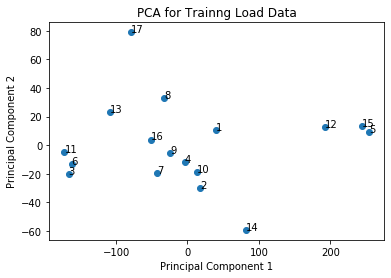

In [20]:
training = player_data[['AcuteLoad','ChronicLoad','AcuteChronicRatio']]
plotPCA(training, player_id_series, 2, 'PCA for Trainng Load Data')

[[-1.24211716 -0.31005618]
 [-1.23654713  0.07913525]
 [ 0.95687828 -0.36457979]
 [-2.66466569 -0.3281208 ]
 [ 1.54122865  0.40463582]
 [ 0.69124052  0.03583102]
 [-1.22707447 -0.26847064]
 [ 1.9501519   0.04093342]
 [-0.3021952   0.74301242]
 [-1.95193821 -0.4325915 ]
 [-0.23619108  0.09602351]
 [ 0.83920132  0.62976652]
 [ 0.29325783 -0.35646611]
 [ 0.8543678  -0.36332646]
 [ 4.78127154 -0.22565728]
 [-0.74485635 -0.0482414 ]
 [-2.30201254  0.6681722 ]]


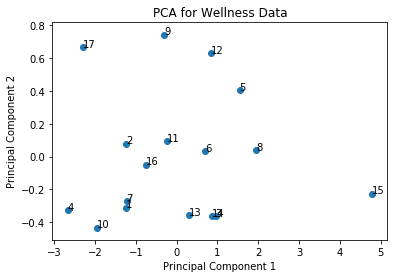

In [21]:
wellness = player_data[['MonitoringScore', 'Pain', 'Illness', 'Menstruation', 'Nutrition']]
plotPCA(wellness, player_id_series, 2, 'PCA for Wellness Data')

As we can see, there is no special relationship between the clusters for performance, training and wellness. This gives us some hint that in general there might be no specific relationship between RPE, wellness and performance clusters but to make more robust conclusion we need to dig into this deeper by applying a regression model that is suitable for timeseries data such as random mixed models or GEEs. This is done in the performance_vs_training_load_and_wellness notebook.